In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
callback = EarlyStopping(
    patience = 5,
    monitor = "val_loss",
    restore_best_weights = True
)

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.22,
    zoom_range = 0.4,
    horizontal_flip = True,
    brightness_range=[0.8,1.2])
X = train_datagen.flow_from_directory(
        r"C:\Users\manav\OneDrive\Desktop\Acne Detection Dataset\Training Data",
        target_size = (64,64),
        class_mode = 'binary',
        batch_size = 16
    )

Found 2800 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
)
y = test_datagen.flow_from_directory(
    r"C:\Users\manav\OneDrive\Desktop\Acne Detection Dataset\Testing Data",
    target_size = (64,64),
    class_mode = 'binary',
    batch_size = 16
)

Found 800 images belonging to 2 classes.


In [5]:
cnn = Sequential()

In [6]:
cnn.add(Conv2D(activation="relu",kernel_size = 3,input_shape = [64,64,3],filters = 128))

C:\Users\manav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(MaxPool2D(strides = 2,pool_size = 2))

In [8]:
cnn.add(Conv2D(activation="relu",kernel_size = 3,filters = 128))
cnn.add(MaxPool2D(strides = 2,pool_size = 2))
cnn.add(Conv2D(activation="relu",kernel_size = 3,filters = 128))
cnn.add(MaxPool2D(strides = 2,pool_size = 2))

In [9]:
cnn.add(Flatten())

In [10]:
cnn.add(Dense(128,activation = "relu"))
cnn.add(Dense(128,activation = "relu"))
cnn.add(Dense(1,activation = "sigmoid"))


In [11]:
# from tensorflow.keras.optimizers import Adam
# cnn.compile(optimizer = Adam(learning_rate=1e-4),loss = "binary_crossentropy",metrics=["accuracy","recall"])
# history = cnn.fit(X,epochs = 20,validation_data = y, callbacks=[callback] )
# cnn.summary()

In [12]:
cnn = models.load_model("acne_detection.keras")
history = cnn
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\manav\Downloads\pexels-anna-nekrashevich-6475987.jpg",target_size = (64,64))
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
result = cnn.predict(img)
if result[0][0] == 0:
    print("Has Acne")
elif result[0][0] == 1:
    print("No Acne Detected")
y.class_indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
Has Acne


{'Acne': 0, 'normal': 1}

In [14]:
#Saving The Model For Future Ease
cnn.save("acne_detection.keras")

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"] , label = "Training Loss")
plt.plot(history.history["val_loss"] , label = "Validation Loss")
plt.xlabel("Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig(r"C:\Users\manav\OneDrive\Desktop\Result\Loss_Comparison.png")
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

In [ ]:
plt.plot(history.history["accuracy"] , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(r"C:\Users\manav\OneDrive\Desktop\Result\Accuracy_Comparison.png")
plt.show()

In [ ]:
plt.plot(history.history["recall"] , label = "Training Recall")
plt.plot(history.history["val_recall"] , label = "Validation Recall")
plt.xlabel("Epochs")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()
plt.savefig("Recall_Comparison.png")
plt.show()

In [13]:
import cv2
import tkinter 
import os

In [2]:

counter = 1
def check(a):
    global counter
    t =""
    img = image.load_img(a,target_size = (64,64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    result = cnn.predict(img)
    if result[0][0] == 0:
        t= "Acne"
    elif result[0][0] == 1:
        t = "No Acne"
    image_bgr = cv2.imread(a)
    #Converting into RGB for Matplotlib
    image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(t)
    save_path = os.path.join(r"C:\Users\manav\OneDrive\Desktop\Result",f"{counter}.png")
    plt.savefig(save_path)
    plt.show()
    counter+=1
    return t
    

In [ ]:
#Using Camera for Testing Model
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    if not ret:
        break
        
    cv2.imshow("Live Camera",frame)
    
    if cv2.waitKey(1) & 0xFF ==ord("q"):
        break
    elif cv2.waitKey(1) & 0xFF ==ord("c"):
        filename = os.path.join(r"C:\Users\manav\OneDrive\Desktop\Acne",f"capture[{counter}].jpg")
        
        cv2.imwrite(filename,frame)
        r = check(filename)
        
       
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


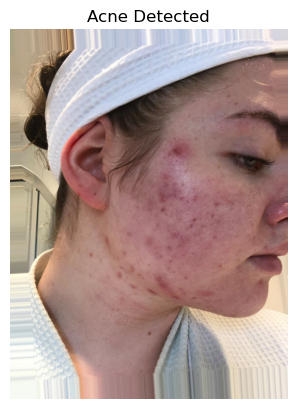

In [21]:
#Using tkinter to check the already downloaded images
from tkinter import filedialog
root = tkinter.Tk()
root.withdraw()
file_path = filedialog.askopenfilenames(
    title = "Select the images.",
    filetypes=[("Image Files", "*.jpg *.jpeg *.png *.bmp.*avif *.tiff *.gif *.webp"), ("All Files", "*.*")]
)

if file_path :
    for i in range(len(file_path)):
        check(file_path[i])
else:
    print("No image selected.")

In [3]:
def get_recommendation(result):
    if result == "Acne":
        return {
            "Routine": [
                "Cleanser: CeraVe Foaming Facial Cleanser",
                "Treatment: The Ordinary Niacinamide 10% + Zinc 1%",
                "Moisturizer: Neutrogena Hydro Boost Water Gel",
                "Sunscreen: La Shield SPF 40"
            ],
            "Tips": [
                "Avoid heavy oils or comedogenic products.",
                "Wash pillowcases twice a week.",
                "Stay hydrated and maintain a balanced diet."
            ]
        }
    else:
        return {
            "Routine": [
                "Cleanser: Cetaphil Gentle Skin Cleanser",
                "Moisturizer: Minimalist Vitamin E Moisturizer",
                "Sunscreen: Derma Co SPF 50"
            ],
            "Tips": [
                "Maintain gentle exfoliation once a week.",
                "Use non-comedogenic products.",
                "Keep hydration consistent."
            ]
        }
